%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib
Here we compute the critical point of Upd and Updx-Updy


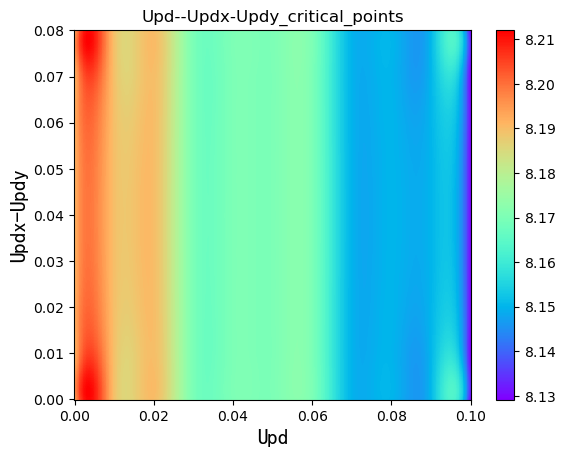

In [1]:
%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *
import scipy as sp
from scipy.optimize import leastsq
from scipy.interpolate import Rbf  # radial basis functions
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

def adjust_array_length(a, desired_length):
    start = a[0]
    end = a[-1]
    adjusted_array = np.linspace(start, end, desired_length)
    return adjusted_array

def take_between_values_inclusive(arr, target_value1, target_value2):
    mask = (arr >= target_value1) & (arr <= target_value2)
    result_array = arr[mask]
    return result_array


#All parameters
ed = 0
tpd = 1.5
tpp = 0.55

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.0
B = 0.15
C = 0.58

ep_avgs1 = np.arange(0.0, 6.49, 0.5)
ep_avgs2 = np.arange(6.5, 8.99, 0.1)
ep_avgs3 = np.arange(9.00,12.01 , 0.5)
eps=np.hstack((np.hstack((ep_avgs1, ep_avgs2)),ep_avgs3))
difs = np.arange(0.0, 0.051, 0.005) 
# eps = np.arange(3.5, 3.51, 1) 
# difs = np.arange(0, 0.051, 0.005) 

Upps = np.arange(0, 4.01, 0.2) 
Udifs = np.arange(0, 1.01, 0.05)

Vpps = np.arange(0.0, 0.01, 0.1)

Upds = np.arange(0.0,0.11,0.01)
Updfs = np.arange(0,0.041,0.004)

Norb = 7
Mc = 10
eta = 0.2


#Choose X&Y labels
#There are Upp,Udif(Upp difference),Upd,Updf(Upd difference),ep and ep difference ,you should choose two as X&Y labels
All_labels = ('Upp','Udif','Upd','Updf','ep','dif')
All_axis_names = ('Upp','Uppx-Uppy','Upd','Updx-Updy','ep','epx-epy')
X = All_labels[2]
Y = All_labels[3]
axisX = All_axis_names[2]
axisY = All_axis_names[3]

Idx  = ['0.0']*6

for  i in All_labels:
    if X==i:
        Idx[All_labels.index(i)]='XX'
    elif Y==i:
        Idx[All_labels.index(i)]='YY'
print('Here we compute the critical point of',axisX,'and',axisY)
Xi = []
Yi = []
Zi = []
for XX in eval(X+'s'):
    XX = round(XX,4)
    for YY in eval(Y+'s'):
        YY = round(YY,4)
        if Norb==7:
            ff = 'GS_weights_Norb7_tpp'+str(tpp)+'_diff0.0_Upp'+str(eval(Idx[0]))+'_Udif'+str(eval(Idx[1])) \
                 +'_Vpp'+str(0.0)+'_Upd'+str(eval(Idx[2]))+'_Updf'+str(eval(Idx[3]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
        if Norb==9 or Norb==11:
            ff = 'GS_weights_'+'Norb'+str(Norb)+'_pps'+str(pps)+'_ppp'+str(ppp)+'_diff0.0'+\
                 '_Upp'+str(eval(Idx[0]))+'_Udif'+str(eval(Idx[1]))+'_Vpp'+str(0.0)+'_Upd'+str(eval(Idx[2]))+\
                 '_Updf'+str(eval(Idx[3]))+'_Mc'+str(Mc)+'_eta'+str(eta)+'.txt'
        a = loadtxt('./data_GS/'+ff,skiprows=0)
        if Norb==9 or Norb==11:
            a = np.delete(c, 3, axis=1)
        seen_values = set()
        a_new = []
        for row in a:
            value = row[1]
            if value not in seen_values:
                a_new.append(row)
                seen_values.add(value)
        sorted_a= sorted(a_new, key=lambda x: x[1])
        sorted_a=np.array(sorted_a)
        for i in range(1,len(sorted_a)):
            if abs(sorted_a[i,7]-sorted_a[i-1,7])>0.3:
                cp = round((sorted_a[i-1,1]+sorted_a[i-1,2])*0.5+0.05,2)
                idx = i-1
                break
#         print(cp)
        Xi.append(XX)
        Yi.append(YY)
        Zi.append(cp)
            
            
#RBF Function
rbf_fun = Rbf(Xi, Yi, Zi, function='cubic')

Xi_new = adjust_array_length(eval(X+'s'), 500)
Yi_new = adjust_array_length(eval(Y+'s'), 500)

x_grid, y_grid = np.meshgrid(Xi_new, Yi_new)
Zi_new = rbf_fun(x_grid.ravel(), y_grid.ravel()).reshape(x_grid.shape)

fig=plt.pcolor(Xi_new,2* Yi_new, Zi_new,cmap=plt.cm.rainbow)
colorbar = plt.colorbar(fig,ticks=ticker.MaxNLocator(nbins=10))
colorbar.formatter = ScalarFormatter(useMathText=True)
colorbar.update_ticks()
# plt.scatter(Xi,list(np.array(Yi)*2))
plt.xlabel(axisX, fontproperties='simHei', fontsize=15)
plt.ylabel(axisY, fontproperties='simHei', fontsize=15)
plt.title(axisX+'--'+axisY+'_critical_points');
savefig(axisX+'--'+axisY+'_critical_points'+'.pdf')